In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#linear regression data as a dictionary
linear_regression_data = {
    'num_rooms': [1, 1, 2, 2, 2, 3, 4, 4, 5, 5],
    'pool': [0, 1, 0, 1, 0, 1, 0, 1, 0, 1],
    'sqft': [ 1000, 1200, 1100, 1300, 1500, 1700, 2000, 2300, 2500, 2700],
    'garage': [ 0, 1, 1, 1, 1, 2, 2, 2, 2, 2],
    'price': [ 120, 130, 124, 142, 165, 191, 230, 243, 277, 311]
    }

In [3]:
# converting the dictionary to a dataframe
df = pd.DataFrame(linear_regression_data)
df

,num_rooms,pool,sqft,garage,price
0,1,0,1000,0,120
1,1,1,1200,1,130
2,2,0,1100,1,124
3,2,1,1300,1,142
4,2,0,1500,1,165
5,3,1,1700,2,191
6,4,0,2000,2,230
7,4,1,2300,2,243
8,5,0,2500,2,277
9,5,1,2700,2,311


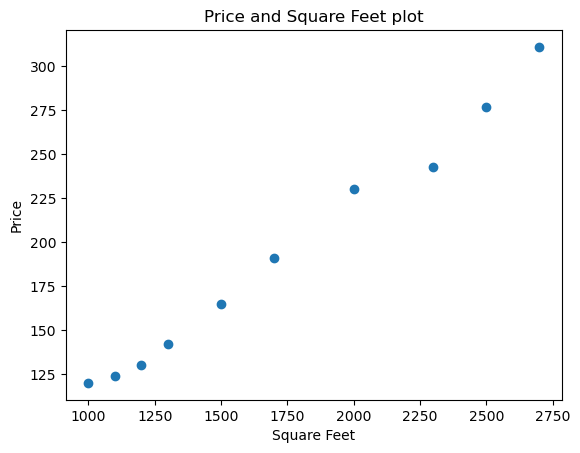

In [4]:
plt.scatter(df['sqft'], df['price'])
plt.xlabel('Square Feet')
plt.ylabel('Price')
plt.title('Price and Square Feet plot')
plt.show()

In [5]:
# choose the features and the target
X = df[['num_rooms','pool', 'sqft','garage']].to_numpy()
y = df['price'].to_numpy()

In [6]:
print(f"X Shape: {X.shape}, X Type:{type(X)})")
print(f"y Shape: {y.shape}, y Type:{type(y)})")

X Shape: (10, 4), X Type:<class 'numpy.ndarray'>)
y Shape: (10,), y Type:<class 'numpy.ndarray'>)


In [7]:
# setting up intial coefficients for the model
W = np.array([ 0.92, 12, -13, 42])
b = 0.7

In [8]:
# cost function is sum of squared errors, MSE
def cost_function(x, y ,w ,b):
    cost = 0.0
    m = x.shape[0]
    for i in range(m):
        prediction = np.dot(x[i], w) + b
        cost = cost + (prediction - y[i])**2
    cost = cost / (2 * m)
    return cost

In [9]:
# Gradient calculation for gradient descent optimizer algorithm
def gradient(x, y , w, b):
    m,n = X.shape
    dj_dw = np.zeros((n,))
    dj_db = 0.
    for i in range(m):                             
        err = (np.dot(X[i], w) + b) - y[i]   
        for j in range(n):                         
            dj_dw[j] = dj_dw[j] + err * x[i, j]    
        dj_db = dj_db + err                        
    dj_dw = dj_dw / m                                
    dj_db = dj_db / m                                
    return dj_db, dj_dw

In [10]:
import copy
def fit(X, y, w_in, b_in, cost_function, gradient_function, alpha, num_iters): 
    w = copy.deepcopy(w_in)  #to avoid changing the original w_in
    b = b_in
    
    for i in range(num_iters):

        # compute the gradients and update the coefficients
        dj_db,dj_dw = gradient_function(X, y, w, b)

        # update coefficients
        w = w - alpha * dj_dw
        b = b - alpha * dj_db
        if i % 100 == 0:
            cost = cost_function(X, y, w, b)
            print(f'epoch: {i}, cost: {cost:.4f}')
    return w, b

In [11]:
# run the model training to get the optimal coefficients
init_w = np.zeros_like(W)
init_b = 0.
alpha = 0.0000005
iterations = 10000
w_opt, b_opt = fit(X, y , init_w, init_b, cost_function, gradient, alpha, iterations)
print(f'W = {w_opt}, b = {b_opt}')

epoch: 0, cost: 9223.2098
epoch: 100, cost: 21.7589
epoch: 200, cost: 21.7588
epoch: 300, cost: 21.7587
epoch: 400, cost: 21.7586
epoch: 500, cost: 21.7585
epoch: 600, cost: 21.7584
epoch: 700, cost: 21.7584
epoch: 800, cost: 21.7583
epoch: 900, cost: 21.7582
epoch: 1000, cost: 21.7581
epoch: 1100, cost: 21.7580
epoch: 1200, cost: 21.7579
epoch: 1300, cost: 21.7578
epoch: 1400, cost: 21.7577
epoch: 1500, cost: 21.7576
epoch: 1600, cost: 21.7575
epoch: 1700, cost: 21.7574
epoch: 1800, cost: 21.7573
epoch: 1900, cost: 21.7572
epoch: 2000, cost: 21.7572
epoch: 2100, cost: 21.7571
epoch: 2200, cost: 21.7570
epoch: 2300, cost: 21.7569
epoch: 2400, cost: 21.7568
epoch: 2500, cost: 21.7567
epoch: 2600, cost: 21.7566
epoch: 2700, cost: 21.7565
epoch: 2800, cost: 21.7564
epoch: 2900, cost: 21.7563
epoch: 3000, cost: 21.7562
epoch: 3100, cost: 21.7561
epoch: 3200, cost: 21.7561
epoch: 3300, cost: 21.7560
epoch: 3400, cost: 21.7559
epoch: 3500, cost: 21.7558
epoch: 3600, cost: 21.7557
epoch: 3700

In [12]:
# make predictions for plotting
m = X.shape[0]
p = np.zeros(m)
predict = lambda w_opt, b_opt, x: [np.dot(w_opt, x) + b_opt for x in X]
p = predict(w_opt, b_opt, X)

In [13]:
# get only the areas data for plotting
areas = []
for i in range(len(y)):
    areas.append(X[i][2])

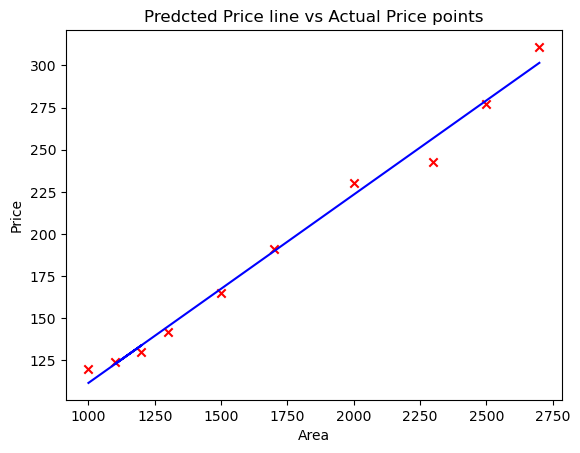

In [14]:
# plot the line of predected values
plt.plot(areas, p, c = "b")

# plot the actual values
plt.scatter(areas, y, marker='x', c='r')
plt.xlabel('Area')
plt.ylabel('Price')
plt.title('Predcted Price line vs Actual Price points')
plt.show()